<a href="https://colab.research.google.com/github/emmanueltiti/R-programming-wk1/blob/main/BONFIRE_EUROPE_TRAVEL_RECOMMENDATION_GUIDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***HOTEL RECOMMENDATION SYSTEM USING CONTENT BASED FILTERING***

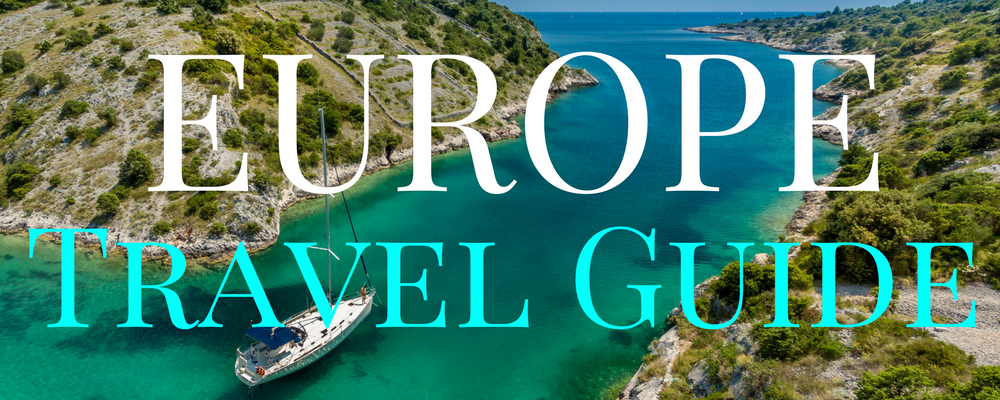

# **1. Defining the Question** 

### a) Specifying the Question

To develop a Travel guide recommender system that can recommend a hotel to a user based on his preferences such as price, quality of service, location, and availability of certain amenities such as swimming pools, gyms among others

### b) Defining the Metric for Success

**Predictive Accuracy Metrics**

Predictive accuracy or rating prediction measures address the subject of how near a recommender’s estimated ratings are to genuine user ratings. This sort of measure is widely used for evaluating non-binary ratings. 

It is best suited for usage scenarios in which accurate prediction of ratings for all products is critical. Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Normalized Mean Absolute Error (NMAE) are the most important measures for this purpose.

**Classification Accuracy Metrics**

Classification accuracy measures attempt to evaluate a recommendation algorithm’s successful decision-making capacity (SDMC). They are useful for user tasks such as identifying nice products since they assess the number of right and wrong classifications as relevant or irrelevant things generated by the recommender system. 

**Rank Accuracy Metrics**

In statistics, a rank accuracy or ranking prediction metric assesses a recommender’s ability to estimate the correct order of items based on the user’s preferences, which is known as rank correlation measurement. As a result, if the user is given a long, sorted list of goods that are recommended to him, this type of measure is most appropriate. 

[Ref link](https://analyticsindiamag.com/how-to-measure-the-success-of-a-recommendation-system/)


### c) Understanding the context

### d) Recording the Experimental Design

### e) Data Relevance

# **2. Importing Libraries.**

## Libraries

In [ ]:
# Importing the necessary libraries
#
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import joblib

## Download of packages

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# **3. Reading the Data**

### a)Initialising the data sources

In [ ]:
# amsterdam
accommodation_Am = "http://tour-pedia.org/download/amsterdam-accommodation.csv"
restaurant_Am = "http://tour-pedia.org/download/amsterdam-restaurant.csv"
poi_Am = "http://tour-pedia.org/download/amsterdam-poi.csv"
attraction_Am = "http://tour-pedia.org/download/amsterdam-attraction.csv"

# Barcelona
accommodation_Bar = "http://tour-pedia.org/download/barcelona-accommodation.csv"
restaurant_Bar = "http://tour-pedia.org/download/barcelona-restaurant.csv"
poi_Bar = "http://tour-pedia.org/download/barcelona-poi.csv"
attraction_Bar = "http://tour-pedia.org/download/barcelona-attraction.csv"

# Berlin
accommodation_Ber = "http://tour-pedia.org/download/berlin-accommodation.csv"
restaurant_Ber = "http://tour-pedia.org/download/berlin-restaurant.csv"
poi_Ber = "http://tour-pedia.org/download/berlin-poi.csv"
attraction_Ber = "http://tour-pedia.org/download/berlin-attraction.csv"

# London
accommodation_Lon = "http://tour-pedia.org/download/london-accommodation.csv"
restaurant_Lon = "http://tour-pedia.org/download/london-restaurant.csv"
poi_Lon = "http://tour-pedia.org/download/london-poi.csv"
attraction_Lon = "http://tour-pedia.org/download/london-attraction.csv"

# Paris
accommodation_Par = "http://tour-pedia.org/download/paris-accommodation.csv"
restaurant_Par = "http://tour-pedia.org/download/paris-restaurant.csv"
poi_Par = "http://tour-pedia.org/download/paris-poi.csv"
attraction_Par = "http://tour-pedia.org/download/paris-attraction.csv"

# Rome
accommodation_Rome = "http://tour-pedia.org/download/rome-accommodation.csv"
restaurant_Rome = "http://tour-pedia.org/download/rome-restaurant.csv"
poi_Rome ="http://tour-pedia.org/download/rome-poi.csv"
attraction_Rome = "http://tour-pedia.org/download/rome-attraction.csv"

# Tuscany
accommodation_Tus = "http://tour-pedia.org/download/tuscany-accommodation.csv"
restaurant_Tus = "http://tour-pedia.org/download/tuscany-restaurant.csv"
poi_Tus = "http://tour-pedia.org/download/tuscany-poi.csv"
attraction_Tus = "http://tour-pedia.org/download/tuscany-attraction.csv"

### b) Loading the datasets

In [ ]:
# assign dataset names
list_of_names = [accommodation_Am, restaurant_Am, poi_Am, attraction_Am,
                 accommodation_Bar, restaurant_Bar, poi_Bar, attraction_Bar,
                 accommodation_Par, restaurant_Par, poi_Par, attraction_Par,
                 accommodation_Ber, restaurant_Ber, poi_Ber, attraction_Ber,
                 accommodation_Lon, restaurant_Lon, poi_Lon, attraction_Lon,
                 accommodation_Rome, restaurant_Rome, poi_Rome, attraction_Rome,
                 accommodation_Tus, restaurant_Tus, poi_Tus, attraction_Tus
                 ]
 

# create empty list
dataframes_list = []
 
# append datasets into the list
for i in range(len(list_of_names)):
  temp_df = pd.read_csv(list_of_names[i], on_bad_lines='skip')
  #temp_df = pd.read_csv("./csv/"+list_of_names[i]+".csv")
  dataframes_list.append(temp_df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,5,6,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## c) Concatenating the datasets

### Accommodation

In [ ]:
# concatenating accommodation for all the 7 cities
frames = [dataframes_list[0], dataframes_list[4], dataframes_list[8], dataframes_list[12], dataframes_list[16], dataframes_list[20], dataframes_list[24]]
accommodation = pd.concat(frames)
accommodation.shape

(30937, 12)

### Restaurants

In [ ]:
# concatenating restaurants for all the 7 cities
frames = [dataframes_list[1], dataframes_list[5], dataframes_list[9], dataframes_list[13], dataframes_list[17], dataframes_list[21], dataframes_list[25]]
restaurants = pd.concat(frames)
restaurants.shape

(142719, 12)

### Point of interest(poi)

In [ ]:
# concatenating poi for all the 7 cities
frames = [dataframes_list[2], dataframes_list[6], dataframes_list[10], dataframes_list[14], dataframes_list[18], dataframes_list[22], dataframes_list[26]]
poi = pd.concat(frames)
poi.shape

(218500, 12)

### Attraction

In [ ]:
# concatenating attraction for all the 7 cities
frames = [dataframes_list[3], dataframes_list[7], dataframes_list[11], dataframes_list[15], dataframes_list[19], dataframes_list[23], dataframes_list[27]]
attraction = pd.concat(frames)
attraction.shape

(39627, 12)

### Concatenating the four datasets (accommodation, restaurants, poi, attraction)

In [ ]:
# final dataset
frames = [accommodation, restaurants, poi, attraction]
tourism = pd.concat(frames)

# **4. Data Understanding.**

## Exploring our Datasets

In [ ]:
# preview the top of the dataset
tourism.head()

,address,category,id,lat,lng,location,name,originalId,polarity,subCategory,details,reviews
0,NaN,accommodation,31052,52.356347,4.997105,Amsterdam,Kos,4e64ba6818a8ce02fdd4b1ce,0,Hotel,http://tour-pedia.org/api/getPlaceDetails?id=3...,http://tour-pedia.org/api/getReviewsByPlaceId?...
1,De Tuin van AJ & Kristel,accommodation,31056,52.355473708753,4.9932861328125,Amsterdam,Hawaijburg,4c6669119cb82d7fbe8b90d2,0,Resort,http://tour-pedia.org/api/getPlaceDetails?id=3...,http://tour-pedia.org/api/getReviewsByPlaceId?...
2,NaN,accommodation,31167,52.382517,4.791104,Amsterdam,Perfect House In Amsterdam!,527011a3498e754b851a3efd,0,Bed & Breakfast,http://tour-pedia.org/api/getPlaceDetails?id=3...,http://tour-pedia.org/api/getReviewsByPlaceId?...
3,NaN,accommodation,31176,52.350272159742,4.7806079636587,Amsterdam,Huize Verel,4e39479eae60f589a5d91d35,0,Resort,http://tour-pedia.org/api/getPlaceDetails?id=3...,http://tour-pedia.org/api/getReviewsByPlaceId?...
4,Lambertus Zijlpelin,accommodation,31248,52.38013065,4.80258218,Amsterdam,d' R.C : Dream Academy,4d87dc29d85f3704d1f8c5db,0,Resort,http://tour-pedia.org/api/getPlaceDetails?id=3...,http://tour-pedia.org/api/getReviewsByPlaceId?...


In [ ]:
# bottom 5
tourism.tail()

,address,category,id,lat,lng,location,name,originalId,polarity,subCategory,details,reviews
18135,257316,Hotel Grotta Giusti Terme,"Via della Grotta Giusti, 1411, Monsummano Term...",attraction,Tuscany,43.86662,10.83121,http://tour-pedia.org/api/getPlaceDetails?id=2...,http://tour-pedia.org/api/getReviewsByPlaceId?...,NaN,NaN,NaN
18136,257317,Hotel Astor,"Viale Giosuè Carducci, 54, Viareggio, Lucca, I...",attraction,Tuscany,43.877462,10.23762,http://tour-pedia.org/api/getPlaceDetails?id=2...,http://tour-pedia.org/api/getReviewsByPlaceId?...,NaN,NaN,NaN
18137,257318,Hotel Marchionni,"Piazza Giacomo Puccini, 2, Viareggio, Lucca, I...",attraction,Tuscany,43.881581,10.236128,http://tour-pedia.org/api/getPlaceDetails?id=2...,http://tour-pedia.org/api/getReviewsByPlaceId?...,NaN,NaN,NaN
18138,257319,"Plaza e de Russie, Viareggio","Piazza Massimo D'Azeglio, 1, Viareggio, Lucca,...",attraction,Tuscany,43.867716,10.243524,http://tour-pedia.org/api/getPlaceDetails?id=2...,http://tour-pedia.org/api/getReviewsByPlaceId?...,NaN,NaN,NaN
18139,257320,Graziella Patio Hotel,"Via Cavour, 23, Arezzo, Italy",attraction,Tuscany,43.464491,11.881488,http://tour-pedia.org/api/getPlaceDetails?id=2...,http://tour-pedia.org/api/getReviewsByPlaceId?...,NaN,NaN,NaN


In [ ]:
# size of the dataset
print("The dataset consist of",tourism.shape[0], "rows and", tourism.shape[1], "columns")

The dataset consist of 431783 rows and 12 columns


In [ ]:
# variables/columns
tourism.columns

Index(['address', 'category', 'id', 'lat', 'lng', 'location', 'name',
       'originalId', 'polarity', 'subCategory', 'details', 'reviews'],
      dtype='object')

# **5. Data Preparation**

## Cleaning our Dataset

### a) Validity

In [ ]:
# Selecting the records that are inappropiately ordered in a new data frame df
df = tourism.loc[tourism['lat'].isin(["poi", "restaurant", "accommodation", "attraction"])]

# Renamimg the columns appropiately that were inappropiately ordered appropiately
df.columns = ["id", "name", "address", "category", "location", "lat", "lng", "details", "reviews", "subCategory",	"originalId",	"polarity" ]

# Dropping the records that are not appropiately ordered
df1 = tourism.drop(tourism[tourism.lat.isin(["poi", "restaurant", "accommodation", "attraction"])].index)

# reordering the columns in the the format of the original data frame(tourism)
df = df[["address",	"category",	"id",	"lat",	"lng",	"location",	"name",	"originalId",	"polarity",	"subCategory",	"details",	"reviews"]]

# Specifying the frames to be concated
frames = [df1, df]

# Concating the dataframes
tourism = pd.concat(frames)

# Preview sample of 30 records to see whether all records are appropiately ordered
tourism.sample(30)

,address,category,id,lat,lng,location,name,originalId,polarity,subCategory,details,reviews
10559,"29 Quai Saint-Michel, Paris, France",poi,452979,48.853511,2.344848,Paris,Cornaille-Lafage Genevieve,NaN,NaN,NaN,http://tour-pedia.org/api/getPlaceDetails?id=4...,http://tour-pedia.org/api/getReviewsByPlaceId?...
4053,"London, United Kingdom 37 Collingham Plac...",accommodation,228436,51.493692055642,-0.19005864858627,London,37 Collingham Place,NaN,NaN,NaN,http://tour-pedia.org/api/getPlaceDetails?id=2...,http://tour-pedia.org/api/getReviewsByPlaceId?...
9537,"Carrer de la Diputació, 273, Barcelona, Spain",poi,501011,41.391052,2.167717,Barcelona,Osteopathic Rebalancing Systems,NaN,NaN,NaN,http://tour-pedia.org/api/getPlaceDetails?id=5...,http://tour-pedia.org/api/getReviewsByPlaceId?...
18636,"107 Fleet Street, London, United Kingdom",poi,382898,51.514263,-0.104825,London,Private Midwife / Midwifery London,NaN,NaN,NaN,http://tour-pedia.org/api/getPlaceDetails?id=3...,http://tour-pedia.org/api/getReviewsByPlaceId?...
10444,"Viale dei Parioli, 184, Rome, Italy",restaurant,263655,41.929193,12.486008,Rome,Numerus Decem Srl,NaN,NaN,NaN,http://tour-pedia.org/api/getPlaceDetails?id=2...,http://tour-pedia.org/api/getReviewsByPlaceId?...
7705,"Eichborndamm 29, Berlin, Germany",restaurant,323399,52.570646,13.312778,Berlin,Dahl Michael van e.K.,NaN,NaN,NaN,http://tour-pedia.org/api/getPlaceDetails?id=3...,http://tour-pedia.org/api/getReviewsByPlaceId?...
43484,"Via Empolese, 34, San Vincenzo A Torri, Scandi...",poi,539187,43.699409,11.098879,Tuscany,Scuola elementaria E. Toti,NaN,NaN,NaN,http://tour-pedia.org/api/getPlaceDetails?id=5...,http://tour-pedia.org/api/getReviewsByPlaceId?...
2143,"Tt. Vasumweg 260, Amsterdam, Netherlands",restaurant,257343,52.412668,4.875082,Amsterdam,Gary's Home-Baked Products,NaN,NaN,NaN,http://tour-pedia.org/api/getPlaceDetails?id=2...,http://tour-pedia.org/api/getReviewsByPlaceId?...
51263,"61-65 Hadlow Road, London, Welling, United Kin...",poi,415525,51.475753,0.120196,London,Karia Dental Dentist Welling & Eltham,NaN,NaN,NaN,http://tour-pedia.org/api/getPlaceDetails?id=4...,http://tour-pedia.org/api/getReviewsByPlaceId?...
12836,"18 Rue de l'Hôpital Saint-Louis, 75010 Paris, ...",poi,455256,48.875515,2.364551,Paris,Ecole Maternelle Hôpital Saint-Louis,NaN,NaN,NaN,http://tour-pedia.org/api/getPlaceDetails?id=4...,http://tour-pedia.org/api/getReviewsByPlaceId?...


All records have been appropiately ordered

### b) Completeness

In [ ]:
# Dealing with missing values 
# Checking the mumber of missing values by column and sorting for the smallest

Total = tourism.isnull().sum().sort_values(ascending=False)

# Calculating percentages
percent_1 = tourism.isnull().sum()/tourism.isnull().count()*100

# rounding off to one decimal point
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# creating a dataframe to show the values
missing_data = pd.concat([Total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
originalId,265940,99.9
polarity,265940,99.9
subCategory,265940,99.9
address,385,0.1
category,0,0.0
id,0,0.0
lat,0,0.0
lng,0,0.0
location,0,0.0
name,0,0.0


In [ ]:
# Impute address with the word missing because 
tourism.address = tourism.address.fillna('Not Available')
tourism.polarity = tourism.polarity.fillna('Not Available')
tourism.subCategory = tourism.subCategory.fillna('Not Available')

In [ ]:
# Drop the 'id','originalId','subCategory','reviews','details'and'polarity' because they have over 50% missing values.
# Being categorical there is no any definate way of imputing without introducing bias into the dataset.
tourism = tourism.drop(['originalId', 'id',],axis=1)

In [ ]:
# Checking for missing values
print(tourism.isnull().sum())

address        0
category       0
lat            0
lng            0
location       0
name           0
polarity       0
subCategory    0
details        0
reviews        0
dtype: int64


### c) Consitency

In [ ]:
# Check for duplicates
tourism.duplicated().sum()

0

      Zero duplicate records exist in our dataset.

#  **6. Exploratory Data Analysis**

### a) Univariate Analysis

In [ ]:
# Let's first check our columns/fields
tourism.columns

Index(['address', 'category', 'lat', 'lng', 'location', 'name', 'polarity',
       'subCategory', 'details', 'reviews'],
      dtype='object')

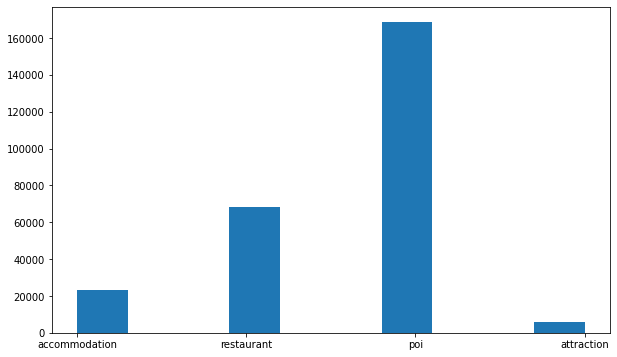

In [ ]:
#Let's plot a histogram to show us the most common category among the 7 cities
plt.figure(figsize=(10,6))
plt.hist(tourism['category'],10)
plt.show()


In the above illustration, we can clearly identify the most ocuuring category in our data set was the point of intrest across all cities.

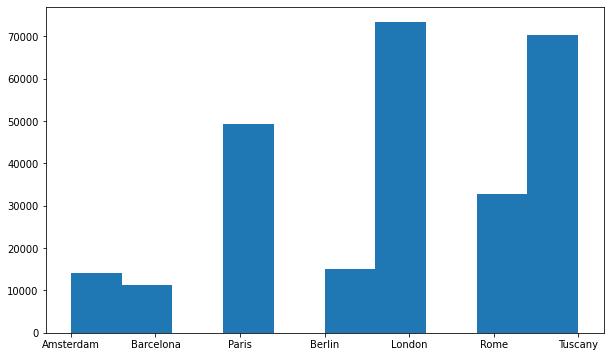

In [ ]:
#As with the above diagram, we can also identify the most common location among the seven cities we're going to focus on.
plt.figure(figsize=(10,6))
plt.hist(tourism['location'])
plt.show()



We can deduce from the above Visualization that London, Tuscany and Paris are the cities that have the most itenary of places to tour.

In [ ]:
# Checking the cities in our dataset
tourism['location'].unique()

array(['Amsterdam', 'Barcelona', 'Paris', 'Berlin', 'London', 'Rome',
       'Tuscany'], dtype=object)

### b) Bivariate Analysis

<Figure size 1008x720 with 0 Axes>

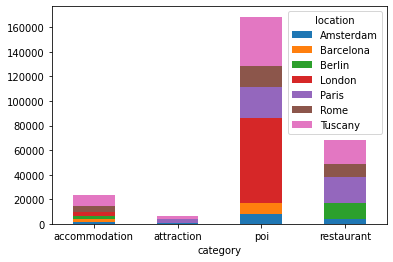

In [ ]:
# Creating A crosstab
crosstb = pd.crosstab(tourism.category, tourism.location)
 
# Creating barplot
plt.figure(figsize=(14,10))
pl = crosstb.plot(kind="bar", stacked=True, rot=0)
plt.show()

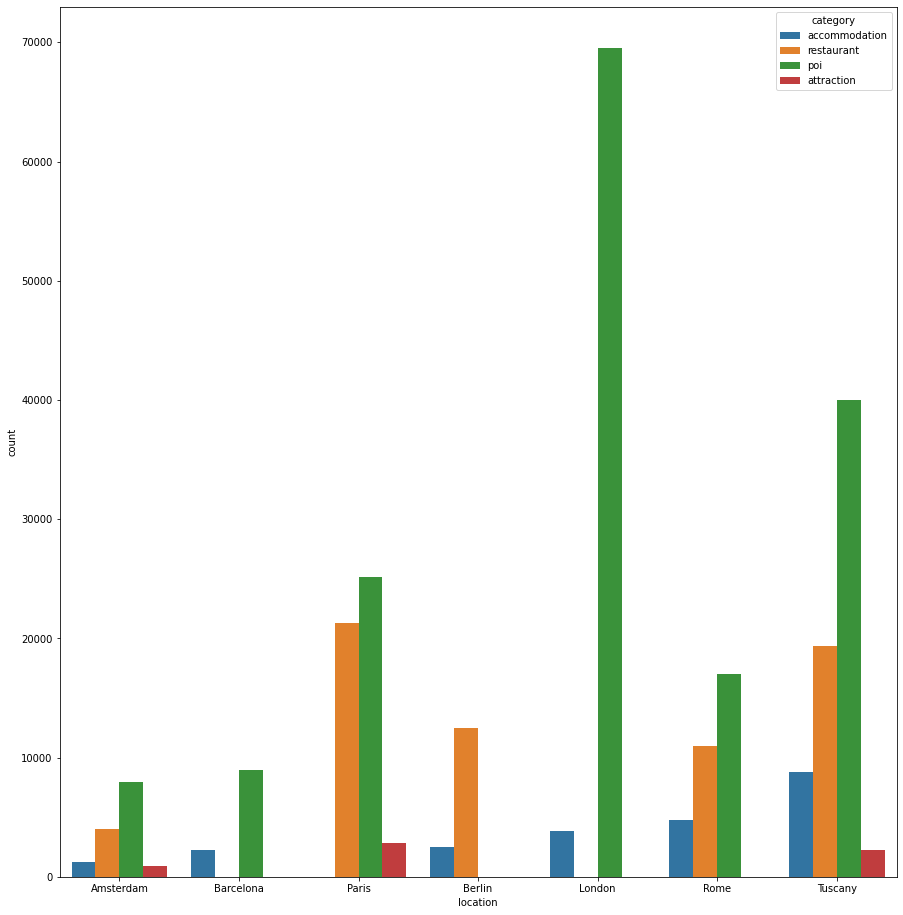

In [ ]:
# Creating a countplot to show how common each category a city holds
plt.figure(figsize=(15,16))
sns.countplot(data=tourism, x=
"location"
, hue=
"category")
plt.show()

From the above illustration, we can draw a few observationss.
1. The city with the had the most points of interests is London followed by Tuscany then Paris.
2. The city had the most restaurants is France followed by Tuscany.
3. We also gathered that only Armsterdam, Paris and Tuscany had the most attraction sites to visit.


# **7. Modeling**

### a) Text Preprocessing

In [ ]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [ ]:
# Creating a copy of orginal dataset
df = tourism.copy()

In [ ]:
# Applying all the functions in description and storing as a name_clean
df['name_clean'] = df['name'].apply(_removeNonAscii)
df['name_clean'] = df.name_clean.apply(func = make_lower_case)
df['name_clean'] = df.name_clean.apply(func = remove_stop_words)
df['name_clean'] = df.name_clean.apply(func=remove_punctuation)
df['name_clean'] = df.name_clean.apply(func=remove_html)

### b) TF-IDF Word2Vec Model

In [ ]:
# Function for recommending tourist destinations based on place name.
# It takes place name and category as an input.def recommend(place_name, category):
from sklearn.metrics.pairwise import cosine_similarity    

    # Matching the category with the dataset and reset the index
df = df.sample(20000)
category = df['category']
location = df['location']


def recommend(name, category, location):
  data = df.loc[df['category'] == category]  
  data = data.loc[data['location'] == location] 
  data.reset_index(level = 0, inplace = True) 
  name = data['name_clean']

  # Convert the index into series
  indices = pd.Series(data.index, index = data['name_clean'])
    
  # Converting the name of the destination into vectors and used bigram
  tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
  tfidf_matrix = tf.fit_transform(data['name_clean'])
    
    # Calculating the similarity measures based on Cosine Similarity
  sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to name of the destination

  # Getting  similarity scores between pairs 
  idx = indices[name]

  # Sorting the names
  sig = list(enumerate(sg[idx]))

  # Scores of the 5 most similar destinations
  sig = sorted(sig, key=lambda x: x[1][0], reverse=True)

  # indices of the destination 
  sig = sig[1:6]
  tourist_indices = [i[0] for i in sig]
   
    # Top 5 tourist recommendation
  rec = data[['address', 'category', 'location', 'name', 'polarity',
       'subCategory', 'details', 'reviews']].iloc[tourist_indices]
  print(rec)   

In [ ]:
²# Testing the model
recommend("Hotels", "accommodation", "London")

                                             address       category location  \
1         52 Rowantree Road, Enfield, United Kingdom  accommodation   London   
2        81 Langham Road, Teddington, United Kingdom  accommodation   London   
3        38-39 Argyle Square, London, United Kingdom  accommodation   London   
4  61 Western Road, London, London-Ealing, United...  accommodation   London   
5  London,   United Kingdom    18 Wilberforce roa...  accommodation   London   

                                          name       polarity    subCategory  \
1                        Comfort Hotel Enfield  Not Available  Not Available   
2  Dga Business Development - Hotels & Leisure  Not Available  Not Available   
3                               Melville Hotel  Not Available  Not Available   
4                        Bricklayer Arms Hotel  Not Available  Not Available   
5                         Central Park Studios  Not Available  Not Available   

                                      

### c) Saving model

In [ ]:
# Saving model
pickle_out = open("model.pkl", "wb")
pickle.dump(recommend, pickle_out)
pickle_out.close()

# **8. Conclusions**

      - More than any other category, point of intrest is the most commonly occiring feature in most eurpean cities
      - London has the most destinations that one can possibly visit
      -The land of the French (Paris) ranked number one in two categories (attractions and restaurants)it has the most restaraunts of any city; Tuscany ranked number one in the variety of hotels whilst London topped in points of interest.


# **9. Recommendations**

      We recommend to our clients who are interested in attractions and restaurants, Paris is the best destination.
      For clients wishing to tour more than one country in Europe, we recommend Paris and London as these two countries have a lot to offer for tourists.
      For our clients interested in points of interest, we recommend London; the Buckingham Palace, London Bridge and many more are marvelous sites.
      For clients traveling for religious reasons, specifically for Catholic races; Rome is the most preferred option; Cities like Vatican offer religious experiences as it is known as the Catholic capital of the world.
      For clients who want to choose among a variety of hotels, Tuscany is the best option. A huge number of hotels gives signal that price discrimination is widely practised in the area and thus all levels of income earners can afford accommodation at one of the hotels in the country.


# **10) Follow up questions**

### a). Did we have the right data?
        Yes.

### b). Do we need other data to answer our question?
        Yes. Other categories such as pricing, weather and ratings need to be incorporated in our data in order to give clients more summarized information. Such information will help clients in budgeting their trips. 

### c). Did we have the right question?
        Yes.